The Happiness scores are based on answers to the main life evaluation question asked in the Gallup World Poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.

In [330]:
## Importing Necessary Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
## Reading the dataset
data=pd.read_csv('happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [332]:
data.shape

(158, 12)

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

- Dataset has 158 rows and 12 columns
- 10 columns have numerical data
- 2 columns have non numeric data
- 'Happiness Score' is our label
- 'Country' can be dropped as it has unique value for each observation
- 'Happiness Rank' can be dropped as it is a ranking given to countries based on their 'Happiness score' and hence can not be used to predict 'Happiness Score'.

In [334]:
data=data.drop(['Country','Happiness Rank'],axis=1)

### Encoding 'Region' using label encoder

In [335]:
## Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [336]:
labelenc=LabelEncoder()
data['Region']=labelenc.fit_transform(data['Region'])
data['Region'].value_counts()

8    40
1    29
3    22
9    21
4    20
6     9
7     7
2     6
5     2
0     2
Name: Region, dtype: int64

#### Successfully encoded feature 'Region'

In [337]:
data.describe()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.993321,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,4.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


- No null values in our dataset
- 'Standard Error', 'Trust (Government Corruption)', 'Family', 'Generosity' look skewed. Same will be confirmed with further analysis

## Checking the skweness

In [338]:
data.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Following features show skewness as they donot lie within the range of +/- 0.5:
- Standard Error
- Family
- Health (Life Expectancy)
- Trust (Government Corruption)
- Generosity <br>


## Checking the outliers

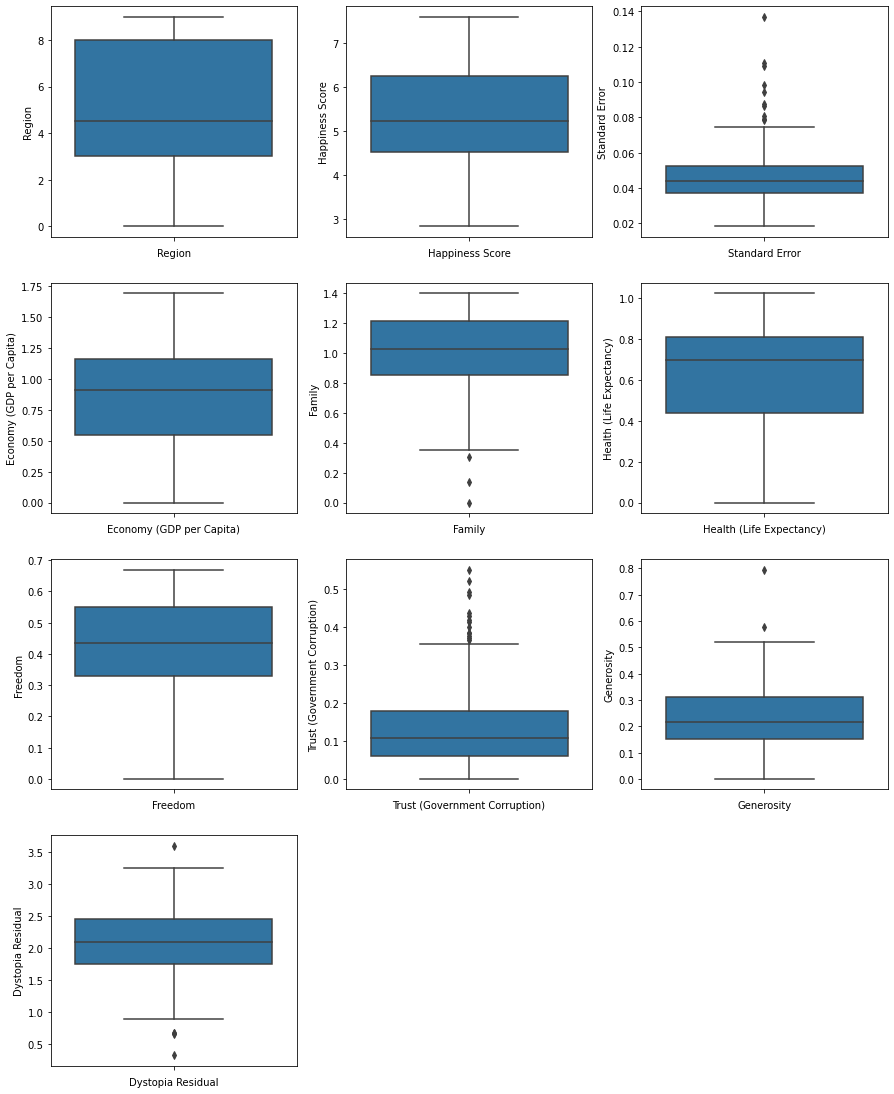

In [339]:
plt.figure(figsize=(15,50))
plotnumber=1

parameters = {'ytick.labelsize': 10,
          'xtick.labelsize': 10}
plt.rcParams.update(parameters)

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

Following features have outliers:
- Standard Error
- Family
- Trust
- Generosity
- Dystopia Residual

## Removing Outliers

#### Z-Score method

In [340]:
# rejecting data beyond 3 std to manage skewness
from scipy.stats import zscore

z_score=zscore(data[['Standard Error','Family','Trust (Government Corruption)','Dystopia Residual','Generosity']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data1=data[filtering_entry]

data1.shape

(149, 10)

In [341]:
loss=((158-149)/158)*100
loss

5.69620253164557

**We are losing 5.7% data which is acceptable**

In [342]:
data1.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

After the outlier removal only 'Standard Error' and 'Trust (Government Corruption)' are showing extreme skewness (beyond +/-1). Hence we will transform only these two features.

In [343]:
#Removing skewness in 'Standard Error' using Log Transformation
data1.loc[:,'Standard Error']=np.log(data1['Standard Error'])

C:\Users\Mandar Shinde\AnacondaNew\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [344]:
##Removing Skewness in Trust (Government Corruption)' using square root transformation
data1.loc[:,'Trust (Government Corruption)']=np.sqrt(data1.loc[:,'Trust (Government Corruption)'])

In [345]:
data1.skew()

Region                          -0.096985
Happiness Score                  0.169740
Standard Error                   0.123220
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.437253
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

## Splitting data into features and label

In [346]:
X=data1.drop('Happiness Score',axis=1)
y=data1['Happiness Score']

## Cheking the relation between label and features:

In [347]:
data1.corr()['Happiness Score']

Region                          -0.145850
Happiness Score                  1.000000
Standard Error                  -0.238213
Economy (GDP per Capita)         0.773577
Family                           0.720868
Health (Life Expectancy)         0.729191
Freedom                          0.585066
Trust (Government Corruption)    0.427308
Generosity                       0.250903
Dystopia Residual                0.528334
Name: Happiness Score, dtype: float64

Text(0.5, 1.0, 'Correlation')

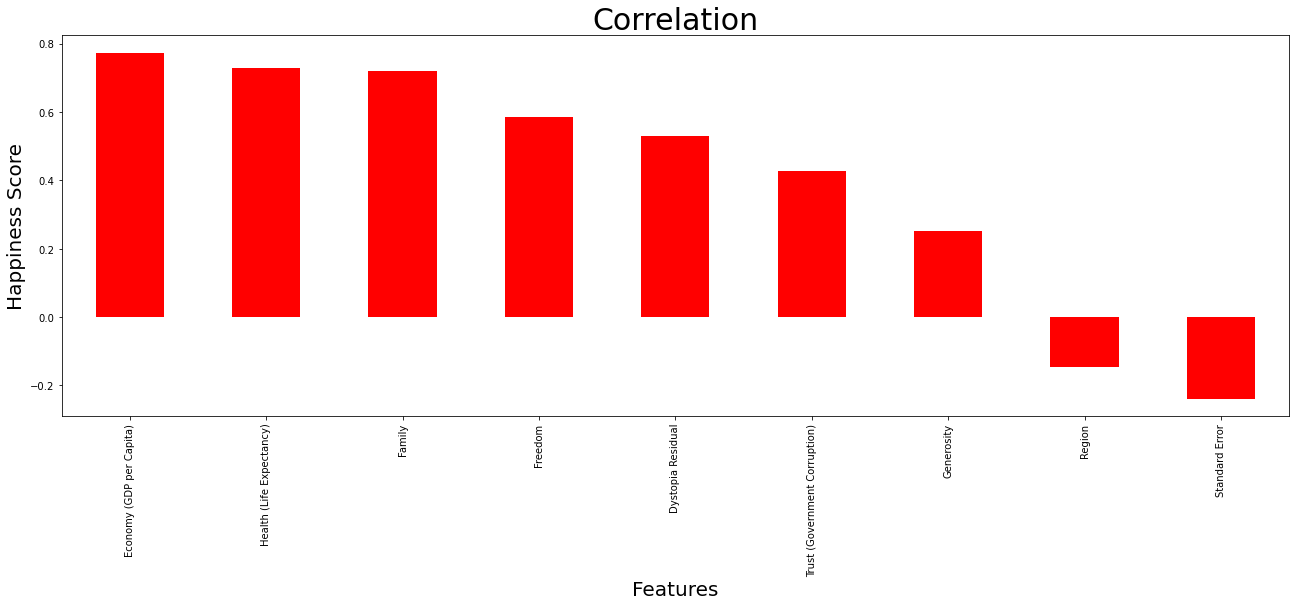

In [348]:
plt.figure(figsize=(22,7))

data1.corr()['Happiness Score'].sort_values(ascending=False).drop(['Happiness Score']).plot(kind='bar',color='r')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Happiness Score',fontsize=20)
plt.title('Correlation',fontsize=30)

**'Region' can be removed as it shows very small correlation with our label**

In [349]:
X=X.drop('Region',axis=1)

### Visualising the relation between Features and Label

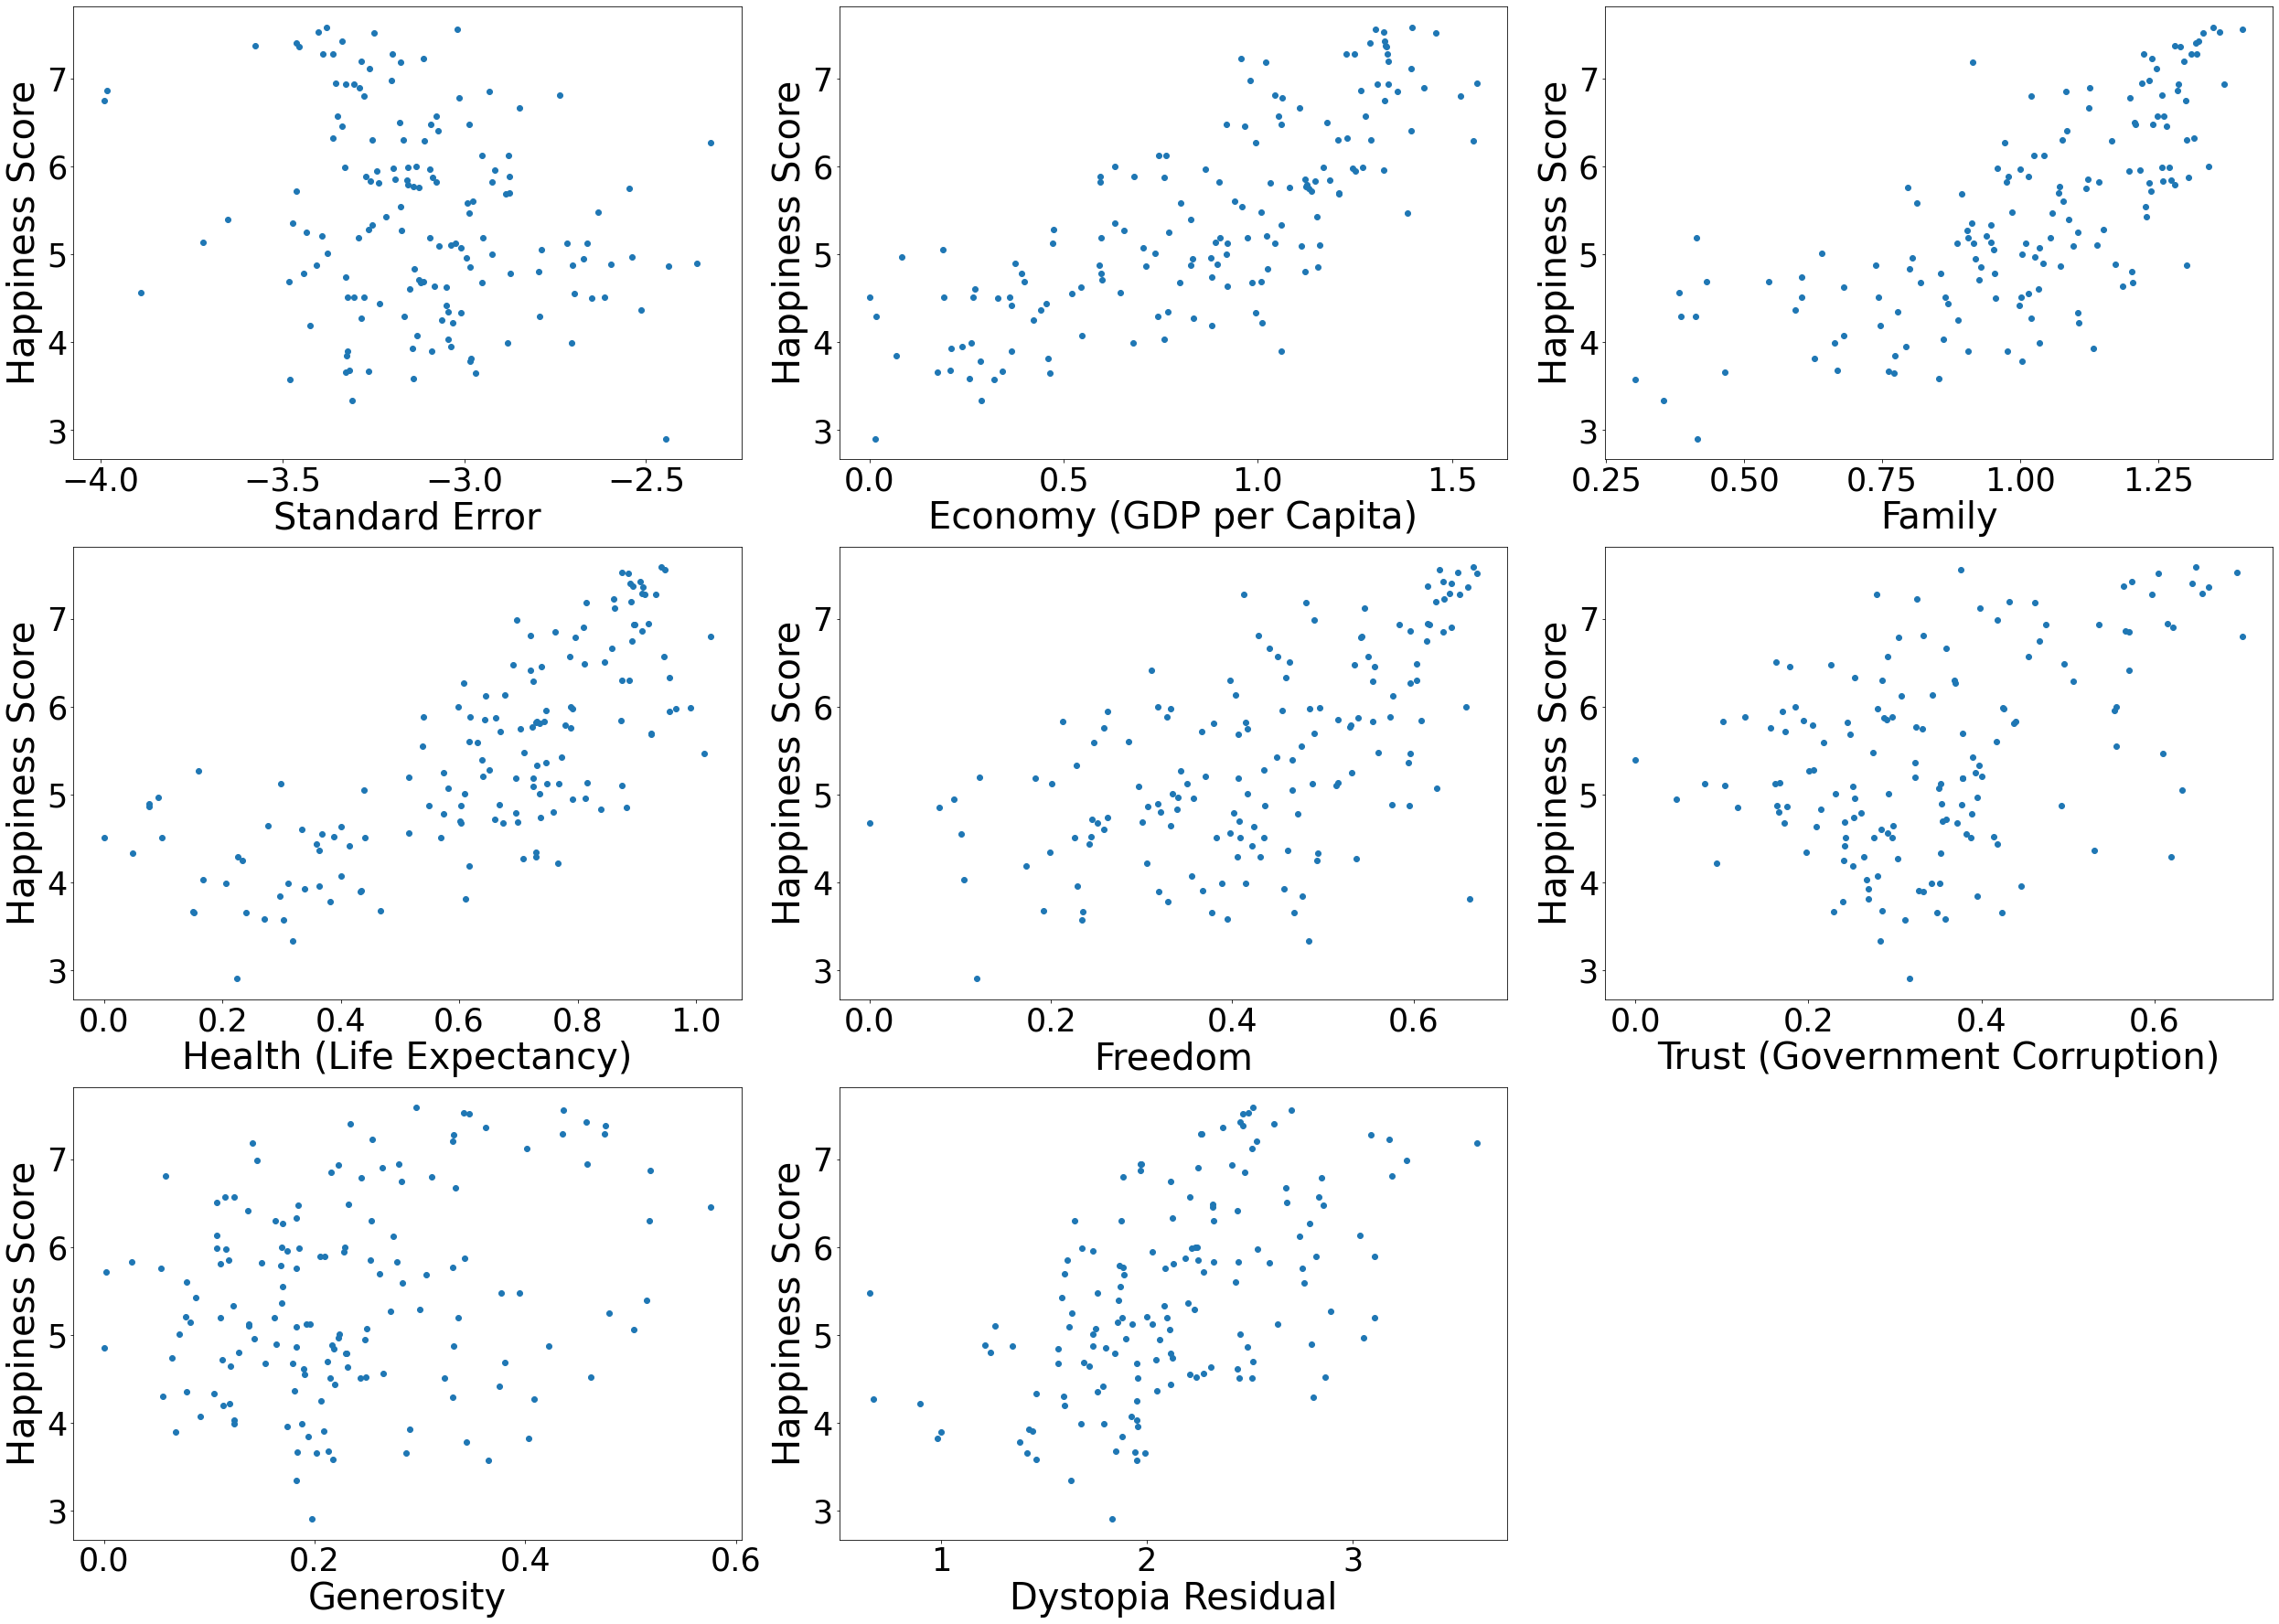

In [350]:
plt.figure(figsize=(35,40),facecolor='white')
plotnumber=1

parameters = {'ytick.labelsize': 35,
          'xtick.labelsize': 35}
plt.rcParams.update(parameters)


for column in X:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=40)
        plt.ylabel('Happiness Score', fontsize=40)
    plotnumber+=1
plt.tight_layout()

## Splitting data in to training and tesing sets

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## Applying Linear Regression Model

In [353]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [354]:
## Fitting the model to training data
linreg.fit(X_train,y_train)

LinearRegression()

In [355]:
y_pred=linreg.predict(X_test)

In [356]:
## Importing performance matrices
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [357]:
linreg.score(X_test,y_test)

0.9995401450273272

In [358]:
r2_score(y_test,y_pred)

0.9995401450273272

In [359]:
cross_val_score(linreg,X,y,cv=5)

array([0.97706391, 0.9908763 , 0.97722914, 0.97839607, 0.99689294])

In [360]:
cross_val_score(linreg,X,y,cv=5).mean()

0.9840916716711053

## Regularization

In [361]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

### Lasso

In [362]:
lassoCV=LassoCV(alphas=np.arange(0.001,0.1,0.01), max_iter=1000, normalize=True)

In [363]:
lassoCV.fit(X_train,y_train)

LassoCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [364]:
lassoCV.alpha_

0.001

In [365]:
lasso=Lasso(alpha=0.001)

In [366]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [367]:
lasso.score(X_test,y_test)

0.9994921861277873

### Ridge

In [368]:
ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [369]:
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [370]:
ridgeCV.alpha_

0.001

In [371]:
ridge=Ridge(alpha=0.001)

In [372]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.001)

In [373]:
ridge.score(X_test,y_test)

0.9995399672825721

- The lasso and ridge scores are same as our linear regression model score.
- Also the cross validation score is alomost equal to r2 score.
- Based on this observations, it can be concluded that our linear regression model fits the data optimally and there is no overfitting.
- As the r2score and cross validation scores are high and equal enoough to consider our linear model as best model. Therefore there is a no need to go for further complex models for this dataset. 

In [374]:
import pickle
filename='HappinessScore_linreg.pkl'
pickle.dump(linreg,open(filename,'wb'))